# **Import necessary libraries**



In [403]:
#import necessary libraries
import pandas as pd
import numpy as np
import os
import random as rand
import string
#!pip install openpyxl # because the docker images on our cocalc servers didn't have it installed for some weird, unknown reason.

# **Custom functions that we will use during this project**

In [404]:
# Create a function to find outliers using IQR
def find_outliers_IQR(df):
    #this function takes a dataframe or only a column and calculates outliers for each value based on IQR
    
    q1 = df.quantile(0.25) # variable for the first quartile
    
    q3 = df.quantile(0.75) #variable for the third quartile
    
    IQR = q3 - q1 #calculate the IQR
    
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] #calculate outliers for every value and put them in a series
    
    return outliers


# Range function
def range_column(df):
    max = df.max()
    min = df.min()
    range = max-min
    return range



# (NA/Null) Value Percentage Calculator
def naValues(df):
    
    for column in df:
        
        total_values = len(df.index) # number of all values in a column
        
        total_garb = df[column].isna().sum() # number off all NA/Null values (apparently null and na are same in pandas, df.isnull() == df.isna())
     
        garb_perc = (total_garb * 100) // total_values
        
        print(column, " has total of ", total_garb, " NA/Null values")
        print("NA/Null percentage of ", column," is ", garb_perc, "% \n")
            

        

# A function that manipulates strings in columns.
def str_basicclean(df,column ='',style = 'cap',sp_char = string.whitespace): # capitalizes strings and strips whitespaces by default, it can strip anything if provided as argument.
    
    
    if type(sp_char) == str:    
        df[column] = df[column].str.strip(sp_char)
    else:
        df[column] = df[column].str.strip()
    
    if style == 'up':
        df[column] = df[column].str.upper()
    elif style == 'low':
        df[column] = df[column].str.lower()
    elif style == 'cap':
        df[column] = df[column].str.capitalize()
    return df[column]

# **Import the raw data via pandas**



In [405]:
#read the excel file and create a data frame
dataFrame = pd.read_excel('Advertising_Sales.xlsx')

## **Display descriptive and technical info about the raw, dirty data**

In [406]:
dataFrame.describe().transpose().round(3)

,count,unique,top,freq
"Data Description : The dataset is designed to simulate a relationship between advertising variables over time, allowing for analysis and exploration of patterns and trends in advertising performance",146,13,2022,13
Unnamed: 1,146,18,Jul,13
Unnamed: 2,146,11,Electronics,46
Unnamed: 3,146,7,Display,69
Unnamed: 4,146,8,Top,47
Unnamed: 5,146,47,60000,6
Unnamed: 6,145,63,1200,7
Unnamed: 7,146.0,25.0,0.0241,15.0
Unnamed: 8,144,48,51,6
Unnamed: 9,145,48,5100,6


In [407]:
#display the head and tail
display(dataFrame.head(), dataFrame.tail())

,"Data Description : The dataset is designed to simulate a relationship between advertising variables over time, allowing for analysis and exploration of patterns and trends in advertising performance",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YEAR,MONTH,**Product_Type,Ad_Type,Ad_Slot,the number of times the ad was viewed,Clicks,CTR,SALESSS,Revenue,Region
2,2011,Jan,Electronics,Display,Top,50000,1200,0.024,50,5000,North
3,2011,Feb,Clothing,Video,Side,35000,800,0.0229,30,3000,"""West"""
4,2011,Mar,Beauty,Display,Bottom,45000,1100,0.0244,40,4000,East


,"Data Description : The dataset is designed to simulate a relationship between advertising variables over time, allowing for analysis and exploration of patterns and trends in advertising performance",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
142,2022,Aug,Clothing,video,Side,48000,1140,0.0238,48,4800,South
143,2022,Sep,Beauty,display,bottom,62000,1500,0.0242,62,6200,North
144,2022,Oct,Electronics,video,Top,77000,1850,0.024,77,7700,West
145,2022,Nov,Clothing,display,Side,58000,1380,0.0238,58,5800,East
146,2022,Dec,Beauty,video,Bottom,70000,1680,0.024,70,7000,South


##### *Looks like there are a couple of descriptive rows that should be skipped so that we could see variable names as the headers.*

In [408]:
#Since the first 2 rows are void of meaningful data, they are skipped.
dataFrame = pd.read_excel('Advertising_Sales.xlsx', skiprows = 2)

display(dataFrame.head(), dataFrame.tail())

,YEAR,MONTH,**Product_Type,Ad_Type,Ad_Slot,the number of times the ad was viewed,Clicks,CTR,SALESSS,Revenue,Region
0,2011,Jan,Electronics,Display,Top,50000,1200.0,0.024,50.0,5000.0,North
1,2011,Feb,Clothing,Video,Side,35000,800.0,0.0229,30.0,3000.0,"""West"""
2,2011,Mar,Beauty,Display,Bottom,45000,1100.0,0.0244,40.0,4000.0,East
3,2011,Apr,Electronics,Video,Top,60000,1500.0,"2,5%",60.0,6000.0,South
4,2011,May,Clothing,Display,Side,40000,NaN,0.025,35.0,3500.0,North


,YEAR,MONTH,**Product_Type,Ad_Type,Ad_Slot,the number of times the ad was viewed,Clicks,CTR,SALESSS,Revenue,Region
140,2022,Aug,Clothing,video,Side,48000,1140.0,0.0238,48.0,4800.0,South
141,2022,Sep,Beauty,display,bottom,62000,1500.0,0.0242,62.0,6200.0,North
142,2022,Oct,Electronics,video,Top,77000,1850.0,0.024,77.0,7700.0,West
143,2022,Nov,Clothing,display,Side,58000,1380.0,0.0238,58.0,5800.0,East
144,2022,Dec,Beauty,video,Bottom,70000,1680.0,0.024,70.0,7000.0,South


##### *Column names should be fixed. Also, values should be unified on object type columns.*



In [409]:
dataFrame.describe().transpose().round(3) # 3 decimal places so it looks nicer

,count,mean,std,min,25%,50%,75%,max
YEAR,145.0,2016.538,3.482,2011.0,2014.0,2017.0,2020.0,2022.0
the number of times the ad was viewed,145.0,54420.690,10951.705,32000.0,46000.0,55000.0,62000.0,80000.0
Clicks,144.0,1292.361,345.721,-1180.0,1100.0,1310.0,1505.0,1950.0
SALESSS,143.0,53.888,11.652,28.0,45.5,54.0,62.0,80.0
Revenue,144.0,5397.917,1160.267,2800.0,4575.0,5500.0,6200.0,8000.0


##### *There is a negative value in "Clicks", which is odd considering the nature of the variable. Other than that, numerical type columns seem to have consistent values.*

In [410]:
#display info about the dataframe
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YEAR                                   145 non-null    int64  
 1   MONTH                                  145 non-null    object 
 2   **Product_Type                         145 non-null    object 
 3   Ad_Type                                145 non-null    object 
 4   Ad_Slot                                145 non-null    object 
 5   the number of times the ad was viewed  145 non-null    int64  
 6   Clicks                                 144 non-null    float64
 7   CTR                                    145 non-null    object 
 8   SALESSS                                143 non-null    float64
 9   Revenue                                144 non-null    float64
 10  Region                                 145 non-null    object 
dtypes: flo

##### *According to the data description, "the number of times the ad was viewed" should be renamed "Impressions".*

#####  *The "CTR" column is described as "Calculated as Clicks/Impressions * 100, represents the percentage of viewers who clicked on the ad." in the data description, which would indicate a float-type variable.*

##### *However, previous cell tells us that CTR column is stored as object-type.*

##### *According to the data description, "Impressions", "Clicks" and "Revenue" variables are continuous, which are better represented as floats. However, "Impressions" is in int type. Likewise, "Sales" is described as a discrete variable, which is in int type and should be float by the same logic. (NA values should be filled before conversion, if there are any.)*

##### *"YEAR" and "MONTH" should be merged under a "Date" column with a ```datetime``` dtype.*

##### *Other columns look consistent with their dtypes and descriptions.*



In [411]:
# let's take a closer look at "CTR"
display(dataFrame["CTR"].head(9), dataFrame["CTR"].tail(9))

0     0.024
1    0.0229
2    0.0244
3      2,5%
4     0.025
5    0.0236
6     0.024
7    0.0234
8     0.025
Name: CTR, dtype: object

136    0.0235
137    0.0236
138    0.0241
139    0.0241
140    0.0238
141    0.0242
142     0.024
143    0.0238
144     0.024
Name: CTR, dtype: object

#####  *It looks like that there are some mixed value types (varying decimal places for floats, and strings like %) in the column.*

##### *Check for duplicates and unique values (will check again later).*

In [412]:
#examine duplicates
display(dataFrame.duplicated().sum(), dataFrame[dataFrame.duplicated(keep=False)])

1

,YEAR,MONTH,**Product_Type,Ad_Type,Ad_Slot,the number of times the ad was viewed,Clicks,CTR,SALESSS,Revenue,Region
138,2022,Jul,Electronics,Display,Top,67000,1620.0,0.0241,67.0,6700.0,East
139,2022,Jul,Electronics,Display,Top,67000,1620.0,0.0241,67.0,6700.0,East


##### *It seems like that there is one duplicate in this dataset, however, it seems unlikely for this dataset to have all of these different values to be the same, that is probably why there is only one. Thus, duplicates should be dropped for a cleaner dataset.*



In [413]:
dataFrame = dataFrame.drop_duplicates() #Drop duplicated rows

dataFrame.duplicated().sum() #Show number of duplicated rows to be sure that there are no duplicated rows

0

In [414]:
#check for the number of unique values
dataFrame.nunique()

YEAR                                     12
MONTH                                    17
**Product_Type                           10
Ad_Type                                   6
Ad_Slot                                   7
the number of times the ad was viewed    46
Clicks                                   62
CTR                                      24
SALESSS                                  47
Revenue                                  47
Region                                   14
dtype: int64

##### *It looks like we have some non-unique values. We will check this later as we further clean the dataset.*

In [415]:
# calculate the amount and percentage of NA/Null values on each column using our custom function, naValues
naValues(dataFrame)

YEAR  has total of  0  NA/Null values
NA/Null percentage of  YEAR  is  0 % 

MONTH  has total of  0  NA/Null values
NA/Null percentage of  MONTH  is  0 % 

**Product_Type  has total of  0  NA/Null values
NA/Null percentage of  **Product_Type  is  0 % 

Ad_Type  has total of  0  NA/Null values
NA/Null percentage of  Ad_Type  is  0 % 

Ad_Slot  has total of  0  NA/Null values
NA/Null percentage of  Ad_Slot  is  0 % 

the number of times the ad was viewed  has total of  0  NA/Null values
NA/Null percentage of  the number of times the ad was viewed  is  0 % 

Clicks  has total of  1  NA/Null values
NA/Null percentage of  Clicks  is  0 % 

CTR  has total of  0  NA/Null values
NA/Null percentage of  CTR  is  0 % 

SALESSS  has total of  2  NA/Null values
NA/Null percentage of  SALESSS  is  1 % 

Revenue  has total of  1  NA/Null values
NA/Null percentage of  Revenue  is  0 % 

Region  has total of  0  NA/Null values
NA/Null percentage of  Region  is  0 % 



##### *There are only a few Null values on Clicks\(1\), Sales\(2\) and Revenue\(1\), which is neat. Considering they are all numerical variables, this will make it easier to fill them later on and we will not be losing any data points by dropping any column.*

##### *It should be kept in mind that while "Impressions" has no missing values, "Sales" has two. They should be filled before conversion.*



##### *To fill the empty values in "Clicks", it is better to use "CTR" and "Impressions" columns instead of using median; as "CTR" is created using "(Clicks/Impressions)&ast;100" and both "CTR" and "Impressions" are void of NA values. It is possible to get the original values in "Clicks" this way.*

#####  *The values should be converted to strings for good measure, stripped of any symbols and whitespaces, and converted to floats back again, with decimal points standardized. Also "Impressions" should be float per data description.*

##### *Then, "Clicks" should be recalculated by applying "(CTR&ast;Impressions)/100".*



##### *We have 3 float-type columns, 2 integer-type and 5 object-type columns. Data seems to be imported fine. Column headers are values. We don't have multiple variables in a column. Both rows and columns hold values. Every column has the same unit in itself.*

##### *Column names look broken and weird. Let's fix that.*



## **Make title names more appropriate**



In [416]:
#take the column names and turn them into capitalized titles
dataFrame.columns = dataFrame.columns.str.title()
dataFrame.head() #display titles to see changes

,Year,Month,**Product_Type,Ad_Type,Ad_Slot,The Number Of Times The Ad Was Viewed,Clicks,Ctr,Salesss,Revenue,Region
0,2011,Jan,Electronics,Display,Top,50000,1200.0,0.024,50.0,5000.0,North
1,2011,Feb,Clothing,Video,Side,35000,800.0,0.0229,30.0,3000.0,"""West"""
2,2011,Mar,Beauty,Display,Bottom,45000,1100.0,0.0244,40.0,4000.0,East
3,2011,Apr,Electronics,Video,Top,60000,1500.0,"2,5%",60.0,6000.0,South
4,2011,May,Clothing,Display,Side,40000,NaN,0.025,35.0,3500.0,North


In [417]:
#rename all titles which should be renamed manually
dataFrame = dataFrame.rename({"**Product_Type" : "Product_Type", 'The Number Of Times The Ad Was Viewed':'Impressions', 'Salesss':'Sales', "Ctr" : "Click_Rate"},axis='columns')
dataFrame.head()

,Year,Month,Product_Type,Ad_Type,Ad_Slot,Impressions,Clicks,Click_Rate,Sales,Revenue,Region
0,2011,Jan,Electronics,Display,Top,50000,1200.0,0.024,50.0,5000.0,North
1,2011,Feb,Clothing,Video,Side,35000,800.0,0.0229,30.0,3000.0,"""West"""
2,2011,Mar,Beauty,Display,Bottom,45000,1100.0,0.0244,40.0,4000.0,East
3,2011,Apr,Electronics,Video,Top,60000,1500.0,"2,5%",60.0,6000.0,South
4,2011,May,Clothing,Display,Side,40000,NaN,0.025,35.0,3500.0,North


### **Tidying Object-Type Columns**



In [418]:
#count the values for columns with object datatype
for column in dataFrame.select_dtypes(include = 'object').columns:
    print(dataFrame[column].value_counts(), "\n")

Month
Jan         12
Jun         12
Feb         12
Aug         12
Jul         12
Sep         12
May         12
Apr         11
Mar         11
Nov         11
Dec         11
Oct         11
October      1
April        1
November     1
MARCH        1
DECEMBER     1
Name: count, dtype: int64 

Product_Type
Beauty          46
Electronics     45
Clothing        45
clothing         2
beauty           1
electronics      1
 Beauty          1
 Electronics     1
 clothing        1
 electronics     1
Name: count, dtype: int64 

Ad_Type
Display     69
Video       68
video        3
display      2
 Video       1
 Display     1
Name: count, dtype: int64 

Ad_Slot
Top       46
Side      46
Bottom    46
Sİide      2
bottom     2
TOp        1
top        1
Name: count, dtype: int64 

Click_Rate
0.0241    14
0.024     13
0.0242    13
0.0246    12
0.0236    11
0.0245    10
0.0237    10
0.0235     9
0.0243     8
0.0238     7
0.0233     5
0.0234     4
0.023      4
0.0244     4
0.0239     4
0.025      3
0.0229  

##### *Before doing any cleaning on object types, "Click_Rate" column should be handled as it requires a type change, and applying object cleaning methods might corrupt data.*



#### **Re-Calculating "Clicks"**

In [419]:
display(dataFrame["Clicks"].head(10), dataFrame["Clicks"].tail(10), dataFrame["Clicks"].describe()) # As reference

0    1200.0
1     800.0
2    1100.0
3    1500.0
4       NaN
5    1300.0
6    1150.0
7     750.0
8    1050.0
9    1400.0
Name: Clicks, dtype: float64

134    1560.0
135    1950.0
136    1340.0
137    1700.0
138    1620.0
140    1140.0
141    1500.0
142    1850.0
143    1380.0
144    1680.0
Name: Clicks, dtype: float64

count     143.000000
mean     1290.069930
std       345.837413
min     -1180.000000
25%      1100.000000
50%      1300.000000
75%      1500.000000
max      1950.000000
Name: Clicks, dtype: float64

In [420]:
dataFrame["Click_Rate"] = dataFrame["Click_Rate"].astype(str) # Make sure we are working on strings as we will strip characters.

display(dataFrame["Click_Rate"].head(10), dataFrame["Click_Rate"].tail(10))

0     0.024
1    0.0229
2    0.0244
3      2,5%
4     0.025
5    0.0236
6     0.024
7    0.0234
8     0.025
9    0.0241
Name: Click_Rate, dtype: object

134     0.024
135    0.0244
136    0.0235
137    0.0236
138    0.0241
140    0.0238
141    0.0242
142     0.024
143    0.0238
144     0.024
Name: Click_Rate, dtype: object

In [421]:
dataFrame["Click_Rate"] = dataFrame["Click_Rate"].str.strip("%") # remove any trailing or leading % signs

display(dataFrame["Click_Rate"].head(10), dataFrame["Click_Rate"].tail(10), dataFrame["Click_Rate"].describe())

0     0.024
1    0.0229
2    0.0244
3       2,5
4     0.025
5    0.0236
6     0.024
7    0.0234
8     0.025
9    0.0241
Name: Click_Rate, dtype: object

134     0.024
135    0.0244
136    0.0235
137    0.0236
138    0.0241
140    0.0238
141    0.0242
142     0.024
143    0.0238
144     0.024
Name: Click_Rate, dtype: object

count        144
unique        24
top       0.0241
freq          14
Name: Click_Rate, dtype: object

##### *The decimal separator should be a dot, not a comma.*

In [422]:
dataFrame["Click_Rate"] = dataFrame["Click_Rate"].str.replace(",", ".")
display(dataFrame["Click_Rate"].head(10), dataFrame["Click_Rate"].tail(10), dataFrame["Click_Rate"].describe())

0     0.024
1    0.0229
2    0.0244
3       2.5
4     0.025
5    0.0236
6     0.024
7    0.0234
8     0.025
9    0.0241
Name: Click_Rate, dtype: object

134     0.024
135    0.0244
136    0.0235
137    0.0236
138    0.0241
140    0.0238
141    0.0242
142     0.024
143    0.0238
144     0.024
Name: Click_Rate, dtype: object

count        144
unique        24
top       0.0241
freq          14
Name: Click_Rate, dtype: object

##### *It does not make sense to have higher amount of data smaller than one, in one-hundreths, and a few ones larger than one, our data description tells that these values are percentages. Since we had values like "2.5%", we should make a demo calculation to see the expected range:*



In [423]:
demo = (dataFrame['Clicks'] / dataFrame['Impressions']) * 100
demo = demo.abs() # to rule out negative values
display(demo.head(10), demo.tail(10), demo.describe())

0    2.400000
1    2.285714
2    2.444444
3    2.500000
4         NaN
5    2.363636
6    2.395833
7    2.343750
8    2.500000
9    2.413793
dtype: float64

134    2.400000
135    2.437500
136    2.350877
137    2.361111
138    2.417910
140    2.375000
141    2.419355
142    2.402597
143    2.379310
144    2.400000
dtype: float64

count    143.000000
mean       2.394807
std        0.050096
min        2.266667
25%        2.361111
50%        2.400000
75%        2.427521
max        2.500000
dtype: float64

##### *At this point it would be safe to assume that all values should be larger than 1, and values that are smaller than 1 should be multiplied by 100 to get the decimal point in the right place. So let's convert them to floats and correct the range.*



In [424]:
dataFrame["Click_Rate"] = dataFrame["Click_Rate"].astype(float)
display(dataFrame["Click_Rate"].head(10), dataFrame["Click_Rate"].tail(10), dataFrame["Click_Rate"].describe())

0    0.0240
1    0.0229
2    0.0244
3    2.5000
4    0.0250
5    0.0236
6    0.0240
7    0.0234
8    0.0250
9    0.0241
Name: Click_Rate, dtype: float64

134    0.0240
135    0.0244
136    0.0235
137    0.0236
138    0.0241
140    0.0238
141    0.0242
142    0.0240
143    0.0238
144    0.0240
Name: Click_Rate, dtype: float64

count    144.000000
mean       0.074001
std        0.344454
min        0.022700
25%        0.023600
50%        0.024000
75%        0.024300
max        2.500000
Name: Click_Rate, dtype: float64

In [425]:
dataFrame["Click_Rate"].value_counts()

Click_Rate
0.0241    14
0.0240    13
0.0242    13
0.0246    12
0.0236    11
0.0245    10
0.0237    10
0.0235     9
0.0243     8
0.0238     7
0.0233     5
0.0234     4
0.0230     4
0.0244     4
0.0239     4
0.0250     3
0.0229     2
0.0232     2
0.0228     2
0.0227     2
0.0247     2
2.4000     1
2.3800     1
2.5000     1
Name: count, dtype: int64

##### *Now multiply the values that are smaller than 1 by 100 to move the decimal point by 2 digits.*

In [426]:
dataFrame["Click_Rate"] = dataFrame["Click_Rate"].apply(lambda x: x * 100 if x < 1 else x)

display(dataFrame["Click_Rate"].head(10), dataFrame["Click_Rate"].tail(10), dataFrame["Click_Rate"].describe())

0    2.40
1    2.29
2    2.44
3    2.50
4    2.50
5    2.36
6    2.40
7    2.34
8    2.50
9    2.41
Name: Click_Rate, dtype: float64

134    2.40
135    2.44
136    2.35
137    2.36
138    2.41
140    2.38
141    2.42
142    2.40
143    2.38
144    2.40
Name: Click_Rate, dtype: float64

count    144.000000
mean       2.395139
std        0.050591
min        2.270000
25%        2.360000
50%        2.400000
75%        2.430000
max        2.500000
Name: Click_Rate, dtype: float64

In [427]:
dataFrame["Click_Rate"].value_counts() # see the values to make sure of the range.

Click_Rate
2.40    14
2.41    14
2.42    13
2.46    12
2.36    11
2.37    10
2.45    10
2.35     9
2.43     8
2.38     7
2.33     5
2.50     4
2.34     4
2.44     4
2.30     4
2.39     4
2.27     2
2.47     2
2.28     2
2.32     2
2.29     2
2.38     1
Name: count, dtype: int64

##### *Column is finally ready to reverse-calculate and fill the NAs in "Clicks". However, we also need to change "Impressions" from int to float as data description suggests that it's continuous.*

In [428]:
dataFrame["Impressions"] = dataFrame["Impressions"].astype(float)

dataFrame["Impressions"].info()

<class 'pandas.core.series.Series'>
Index: 144 entries, 0 to 144
Series name: Impressions
Non-Null Count  Dtype  
--------------  -----  
144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [429]:
# re-calculate "Clicks"

dataFrame["Clicks"] = (dataFrame["Click_Rate"] * dataFrame["Impressions"]) / 100

display(dataFrame["Clicks"].head(10), dataFrame["Clicks"].tail(10), dataFrame["Clicks"].describe())

0    1200.0
1     801.5
2    1098.0
3    1500.0
4    1000.0
5    1298.0
6    1152.0
7     748.8
8    1050.0
9    1397.8
Name: Clicks, dtype: float64

134    1560.0
135    1952.0
136    1339.5
137    1699.2
138    1614.7
140    1142.4
141    1500.4
142    1848.0
143    1380.4
144    1680.0
Name: Clicks, dtype: float64

count     144.000000
mean     1304.234722
std       276.702025
min       748.800000
25%      1098.000000
50%      1298.250000
75%      1500.600000
max      1952.000000
Name: Clicks, dtype: float64

##### *Some values have slightly changed, especially the std.dev: it dropped from 345.83 to 276.70. This might be the result of having negative values and some NAs as well, which shouldn't have been there in the first place. It is likely that the final calculation is more accurate if not 100% correct.*

##### *Let's see if "Clicks" is void of NAs now that we reverse-calculated it.*

In [430]:
naValues(dataFrame)

Year  has total of  0  NA/Null values
NA/Null percentage of  Year  is  0 % 

Month  has total of  0  NA/Null values
NA/Null percentage of  Month  is  0 % 

Product_Type  has total of  0  NA/Null values
NA/Null percentage of  Product_Type  is  0 % 

Ad_Type  has total of  0  NA/Null values
NA/Null percentage of  Ad_Type  is  0 % 

Ad_Slot  has total of  0  NA/Null values
NA/Null percentage of  Ad_Slot  is  0 % 

Impressions  has total of  0  NA/Null values
NA/Null percentage of  Impressions  is  0 % 

Clicks  has total of  0  NA/Null values
NA/Null percentage of  Clicks  is  0 % 

Click_Rate  has total of  0  NA/Null values
NA/Null percentage of  Click_Rate  is  0 % 

Sales  has total of  2  NA/Null values
NA/Null percentage of  Sales  is  1 % 

Revenue  has total of  1  NA/Null values
NA/Null percentage of  Revenue  is  0 % 

Region  has total of  0  NA/Null values
NA/Null percentage of  Region  is  0 % 



##### *It worked. Now let's take all object-type columns through basic cleaning, using our custom function.*

#### **Tidying Object-Type Columns (cont.)**


In [431]:
for column in dataFrame.select_dtypes(include = 'object').columns:
    dataFrame[column] = str_basicclean(dataFrame, column)
    print(dataFrame[column].value_counts(), "\n") # Check again to see changes

Month
Jan         12
Jun         12
Feb         12
Aug         12
Jul         12
Sep         12
May         12
Apr         11
Mar         11
Nov         11
Dec         11
Oct         11
October      1
April        1
November     1
March        1
December     1
Name: count, dtype: int64 

Product_Type
Electronics    48
Clothing       48
Beauty         48
Name: count, dtype: int64 

Ad_Type
Display    72
Video      72
Name: count, dtype: int64 

Ad_Slot
Top       48
Bottom    48
Side      46
Si̇ide     2
Name: count, dtype: int64 

Region
North      35
East       35
South      35
West       35
"west"      1
"east"      1
"south"     1
Nrth        1
Name: count, dtype: int64 



##### *"Product_Type" and "Ad_Type" columns seems OK. "Month", "Ad_Slot", and "Region" needs manual intervention.*

In [432]:
# Fixing the values in "Month".
dataFrame['Month'] = dataFrame['Month'].replace(to_replace = ['October','April','November','March','December'],value = ['Oct','Apr','Nov','Mar','Dec']) #Correct the wrong values manually

# Fixing the values in "Ad Slot".
dataFrame['Ad_Slot'] = dataFrame['Ad_Slot'].replace(to_replace = ['Si̇ide'], value = ['Side']) # Ad Slot column has one broken value "Siide".

# Fixing the values in "Region".
dataFrame['Region'] = str_basicclean(dataFrame,'Region', "cap", ' \"') # Some values have quotation marks to be stripped, hence we passed it as an argument.
dataFrame['Region'] = dataFrame['Region'].replace('Nrth','North') # "nrth" would be "Nrth" after capitalization, but it still needs to be replaced.



display(dataFrame['Month'].value_counts(), dataFrame['Ad_Slot'].value_counts(), dataFrame['Region'].value_counts())

Month
Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: count, dtype: int64

Ad_Slot
Top       48
Side      48
Bottom    48
Name: count, dtype: int64

Region
North    36
West     36
East     36
South    36
Name: count, dtype: int64

In [433]:
for column in dataFrame.select_dtypes(include = 'object').columns:
    print(dataFrame[column].value_counts(), "\n") # Check again to see changes

Month
Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: count, dtype: int64 

Product_Type
Electronics    48
Clothing       48
Beauty         48
Name: count, dtype: int64 

Ad_Type
Display    72
Video      72
Name: count, dtype: int64 

Ad_Slot
Top       48
Side      48
Bottom    48
Name: count, dtype: int64 

Region
North    36
West     36
East     36
South    36
Name: count, dtype: int64 



### **Tidying Non Object-Type Columns (i.e. float and integer-type values)**


In [434]:
# Let's take a value count for each non object column
for column in dataFrame.select_dtypes(exclude = 'object').columns:
    print(dataFrame[column].value_counts(), "\n")

Year
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
Name: count, dtype: int64 

Impressions
51000.0    6
60000.0    6
55000.0    6
58000.0    5
49000.0    5
57000.0    5
62000.0    5
53000.0    5
59000.0    5
65000.0    5
45000.0    5
68000.0    4
42000.0    4
48000.0    4
40000.0    4
63000.0    4
47000.0    4
61000.0    4
50000.0    4
70000.0    3
46000.0    3
43000.0    3
56000.0    3
44000.0    3
41000.0    3
52000.0    3
38000.0    3
35000.0    2
36000.0    2
54000.0    2
77000.0    2
37000.0    2
67000.0    2
64000.0    2
72000.0    2
66000.0    2
71000.0    2
75000.0    2
32000.0    1
74000.0    1
69000.0    1
73000.0    1
39000.0    1
34000.0    1
33000.0    1
80000.0    1
Name: count, dtype: int64 

Clicks
1200.0    3
1500.4    3
1452.0    3
1549.8    3
1277.3    3
         ..
1422.0    1
1021.5    1
1648.2    1
1298.5    1
1680.0    1
Name: count, Length: 109, dtype: int64 

Click_Rate
2.40  

##### *All numerical columns should be checked for negative values regardless.* 

##### *Logically, every numerical column in this dataset should contain only positive values, except for "Revenue", since negative revenues are possible and indicate economic losses.*

##### *Let's look into the amount of negative values in each column.*

In [435]:
for column in dataFrame.select_dtypes(exclude = 'object').columns:
    print("Negative values in column", column, ":" ,(dataFrame[column] < 0).sum().sum())

Negative values in column Year : 0
Negative values in column Impressions : 0
Negative values in column Clicks : 0
Negative values in column Click_Rate : 0
Negative values in column Sales : 0
Negative values in column Revenue : 0


##### *Luckily, there are no negative values in "Revenue", so all columns can be cleaned at once. Let's take absolute value for all columns just to be sure.*

In [436]:
for column in dataFrame.select_dtypes(exclude = 'object').columns:
    print("Negative values in column", column, ":" ,(dataFrame[column] < 0).sum().sum())
    dataFrameAbs = dataFrame.select_dtypes(exclude = 'object').abs()
    dataFrame[column] = dataFrameAbs[column]
    print("after taking abs. val. : ", (dataFrame[column] < 0).sum().sum(), "\n")

Negative values in column Year : 0
after taking abs. val. :  0 

Negative values in column Impressions : 0
after taking abs. val. :  0 

Negative values in column Clicks : 0
after taking abs. val. :  0 

Negative values in column Click_Rate : 0
after taking abs. val. :  0 

Negative values in column Sales : 0
after taking abs. val. :  0 

Negative values in column Revenue : 0
after taking abs. val. :  0 



##### *View all numerical columns to see results.*

In [437]:
for column in dataFrame.select_dtypes(exclude = 'object').columns:
    print(dataFrame[column].value_counts(), "\n")

Year
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
Name: count, dtype: int64 

Impressions
51000.0    6
60000.0    6
55000.0    6
58000.0    5
49000.0    5
57000.0    5
62000.0    5
53000.0    5
59000.0    5
65000.0    5
45000.0    5
68000.0    4
42000.0    4
48000.0    4
40000.0    4
63000.0    4
47000.0    4
61000.0    4
50000.0    4
70000.0    3
46000.0    3
43000.0    3
56000.0    3
44000.0    3
41000.0    3
52000.0    3
38000.0    3
35000.0    2
36000.0    2
54000.0    2
77000.0    2
37000.0    2
67000.0    2
64000.0    2
72000.0    2
66000.0    2
71000.0    2
75000.0    2
32000.0    1
74000.0    1
69000.0    1
73000.0    1
39000.0    1
34000.0    1
33000.0    1
80000.0    1
Name: count, dtype: int64 

Clicks
1200.0    3
1500.4    3
1452.0    3
1549.8    3
1277.3    3
         ..
1422.0    1
1021.5    1
1648.2    1
1298.5    1
1680.0    1
Name: count, Length: 109, dtype: int64 

Click_Rate
2.40  

In [438]:
dataFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,144.0,2016.500000,3.464102,2011.00,2013.75,2016.50,2019.25,2022.0
Impressions,144.0,54333.333333,10939.119510,32000.00,46000.00,55000.00,62000.00,80000.0
Clicks,144.0,1304.234722,276.702025,748.80,1098.00,1298.25,1500.60,1952.0
Click_Rate,144.0,2.395139,0.050591,2.27,2.36,2.40,2.43,2.5
Sales,142.0,53.795775,11.640318,28.00,45.25,54.00,62.00,80.0
Revenue,143.0,5388.811189,1159.170715,2800.00,4550.00,5500.00,6200.00,8000.0


##### *Values in numerical type columns seems consistent and within logical limits, correlating with the data description.*

##### *As it was mentioned previously, "Impressions" and "Sales" should be converted to float and int, respectively; according to the data description. "Impressions" were handled at the beginning of the code, however, the Null values in "Sales" should be filled first to avoid NaN values appearing in the dataset.*

In [439]:
# Converting "Sales" to int.
# Let's fill the missing values with median.

print("Median of 'Sales':", dataFrame["Sales"].median()) # see the median

dataFrame["Sales"] = dataFrame["Sales"].fillna(dataFrame["Sales"].median()) # Fill the NA values with median.
dataFrame[["Sales"]].isna().sum() # see if we have any NAs left in "Sales"

Median of 'Sales': 54.0


Sales    0
dtype: int64

##### *Since there are no NA's left, it is safe to convert "Sales" to int.*

In [440]:
dataFrame["Sales"] = dataFrame["Sales"].astype(int) # Convert "Sales" to int.

display(dataFrame["Sales"].info(), dataFrame["Sales"].head())

<class 'pandas.core.series.Series'>
Index: 144 entries, 0 to 144
Series name: Sales
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


None

0    50
1    30
2    40
3    60
4    35
Name: Sales, dtype: int64

##### *Other columns that had NAs were "Revenue" and "Clicks", which are also numerical. "Clicks" were re-calculated to fill NA values at the beginning. It would be fitting to fill "Revenue" out at this stage.*

In [441]:
dataFrame["Revenue"] = dataFrame["Revenue"].fillna(dataFrame["Revenue"].median())
dataFrame["Revenue"].isna().sum()

0

### **Creating a date column**

##### *It would be more appropriate to have a date column instead of having "Month" and "Year" separately. However, "Year" should be turned into object (string) beforehand, and two columns can be merged as ``period`` type, because we have no day variable. Since we have no NA/Null's on either column, it is fine to proceed with merging.*

##### *We have no days, all months and years ranging from 2011 to 2022.*

In [442]:
# pandas doesn't seem to like date formats as strings, so it was easier and probably necessary to convert string month values from "Jan, Feb, Mar..." to integer "1, 2, 3..."

for i in range(1, 13):
    dataFrame['Month'] = dataFrame['Month'].replace(to_replace = dataFrame['Month'].iloc[i-1] ,value = i)
    
dataFrame["Month"].value_counts()

Month
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
Name: count, dtype: int64

In [443]:
# pd.to_datetime method converts year and month to date if the column names are accordingly set.

dataFrame = dataFrame.rename({"Year" : "year", "Month" : "month"}, axis = "columns")
display(dataFrame[["year", "month"]].head(), dataFrame[["year", "month"]].info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    144 non-null    int64
 1   month   144 non-null    int64
dtypes: int64(2)
memory usage: 3.4 KB


,year,month
0,2011,1
1,2011,2
2,2011,3
3,2011,4
4,2011,5


None

In [444]:
# Now actually create a date column with datetime type

dataFrame["Date"] = pd.to_datetime(dataFrame[["year", "month"]].assign(day = 1)) # construct the column, pd.to_datetime requires that day is specified

dataFrame["Date"] = dataFrame["Date"].dt.to_period("M") # since we have no days on the original dataframe, convert the date-type to a monthly period-type

display(dataFrame["Date"].head(12), dataFrame["Date"].tail(12), dataFrame["Date"].info()) # 12 because there are 12 months

<class 'pandas.core.series.Series'>
Index: 144 entries, 0 to 144
Series name: Date
Non-Null Count  Dtype    
--------------  -----    
144 non-null    period[M]
dtypes: period[M](1)
memory usage: 2.2 KB


0     2011-01
1     2011-02
2     2011-03
3     2011-04
4     2011-05
5     2011-06
6     2011-07
7     2011-08
8     2011-09
9     2011-10
10    2011-11
11    2011-12
Name: Date, dtype: period[M]

132    2022-01
133    2022-02
134    2022-03
135    2022-04
136    2022-05
137    2022-06
138    2022-07
140    2022-08
141    2022-09
142    2022-10
143    2022-11
144    2022-12
Name: Date, dtype: period[M]

None

In [445]:
dataFrame.head()

,year,month,Product_Type,Ad_Type,Ad_Slot,Impressions,Clicks,Click_Rate,Sales,Revenue,Region,Date
0,2011,1,Electronics,Display,Top,50000.0,1200.0,2.40,50,5000.0,North,2011-01
1,2011,2,Clothing,Video,Side,35000.0,801.5,2.29,30,3000.0,West,2011-02
2,2011,3,Beauty,Display,Bottom,45000.0,1098.0,2.44,40,4000.0,East,2011-03
3,2011,4,Electronics,Video,Top,60000.0,1500.0,2.50,60,6000.0,South,2011-04
4,2011,5,Clothing,Display,Side,40000.0,1000.0,2.50,35,3500.0,North,2011-05


##### *Now that we have a date column, year and month are unnecessary.*

In [446]:
dataFrame = dataFrame.drop(columns = ['year', 'month'])
dataFrame.head()

,Product_Type,Ad_Type,Ad_Slot,Impressions,Clicks,Click_Rate,Sales,Revenue,Region,Date
0,Electronics,Display,Top,50000.0,1200.0,2.40,50,5000.0,North,2011-01
1,Clothing,Video,Side,35000.0,801.5,2.29,30,3000.0,West,2011-02
2,Beauty,Display,Bottom,45000.0,1098.0,2.44,40,4000.0,East,2011-03
3,Electronics,Video,Top,60000.0,1500.0,2.50,60,6000.0,South,2011-04
4,Clothing,Display,Side,40000.0,1000.0,2.50,35,3500.0,North,2011-05


##### *Let's see if we have anything unusual or broken with the new dataframe.*

In [447]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Product_Type  144 non-null    object   
 1   Ad_Type       144 non-null    object   
 2   Ad_Slot       144 non-null    object   
 3   Impressions   144 non-null    float64  
 4   Clicks        144 non-null    float64  
 5   Click_Rate    144 non-null    float64  
 6   Sales         144 non-null    int64    
 7   Revenue       144 non-null    float64  
 8   Region        144 non-null    object   
 9   Date          144 non-null    period[M]
dtypes: float64(4), int64(1), object(4), period[M](1)
memory usage: 12.4+ KB


In [448]:
naValues(dataFrame)

dataFrame.duplicated().sum()

Product_Type  has total of  0  NA/Null values
NA/Null percentage of  Product_Type  is  0 % 

Ad_Type  has total of  0  NA/Null values
NA/Null percentage of  Ad_Type  is  0 % 

Ad_Slot  has total of  0  NA/Null values
NA/Null percentage of  Ad_Slot  is  0 % 

Impressions  has total of  0  NA/Null values
NA/Null percentage of  Impressions  is  0 % 

Clicks  has total of  0  NA/Null values
NA/Null percentage of  Clicks  is  0 % 

Click_Rate  has total of  0  NA/Null values
NA/Null percentage of  Click_Rate  is  0 % 

Sales  has total of  0  NA/Null values
NA/Null percentage of  Sales  is  0 % 

Revenue  has total of  0  NA/Null values
NA/Null percentage of  Revenue  is  0 % 

Region  has total of  0  NA/Null values
NA/Null percentage of  Region  is  0 % 

Date  has total of  0  NA/Null values
NA/Null percentage of  Date  is  0 % 



0

##### *There are no NAs and no duplicates.*

In [449]:
dataFrame.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
Impressions,144.0,54333.333,10939.120,32000.00,46000.00,55000.00,62000.00,80000.0
Clicks,144.0,1304.235,276.702,748.80,1098.00,1298.25,1500.60,1952.0
Click_Rate,144.0,2.395,0.051,2.27,2.36,2.40,2.43,2.5
Sales,144.0,53.799,11.559,28.00,45.75,54.00,62.00,80.0
Revenue,144.0,5389.583,1155.148,2800.00,4575.00,5500.00,6200.00,8000.0


### **Detecting and Cleaning Outliers**

##### *Per our instuctors advice, outlier detection is skipped for this project.*

# **Visualizing the Dataset**



## **Import necessary libraries**

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

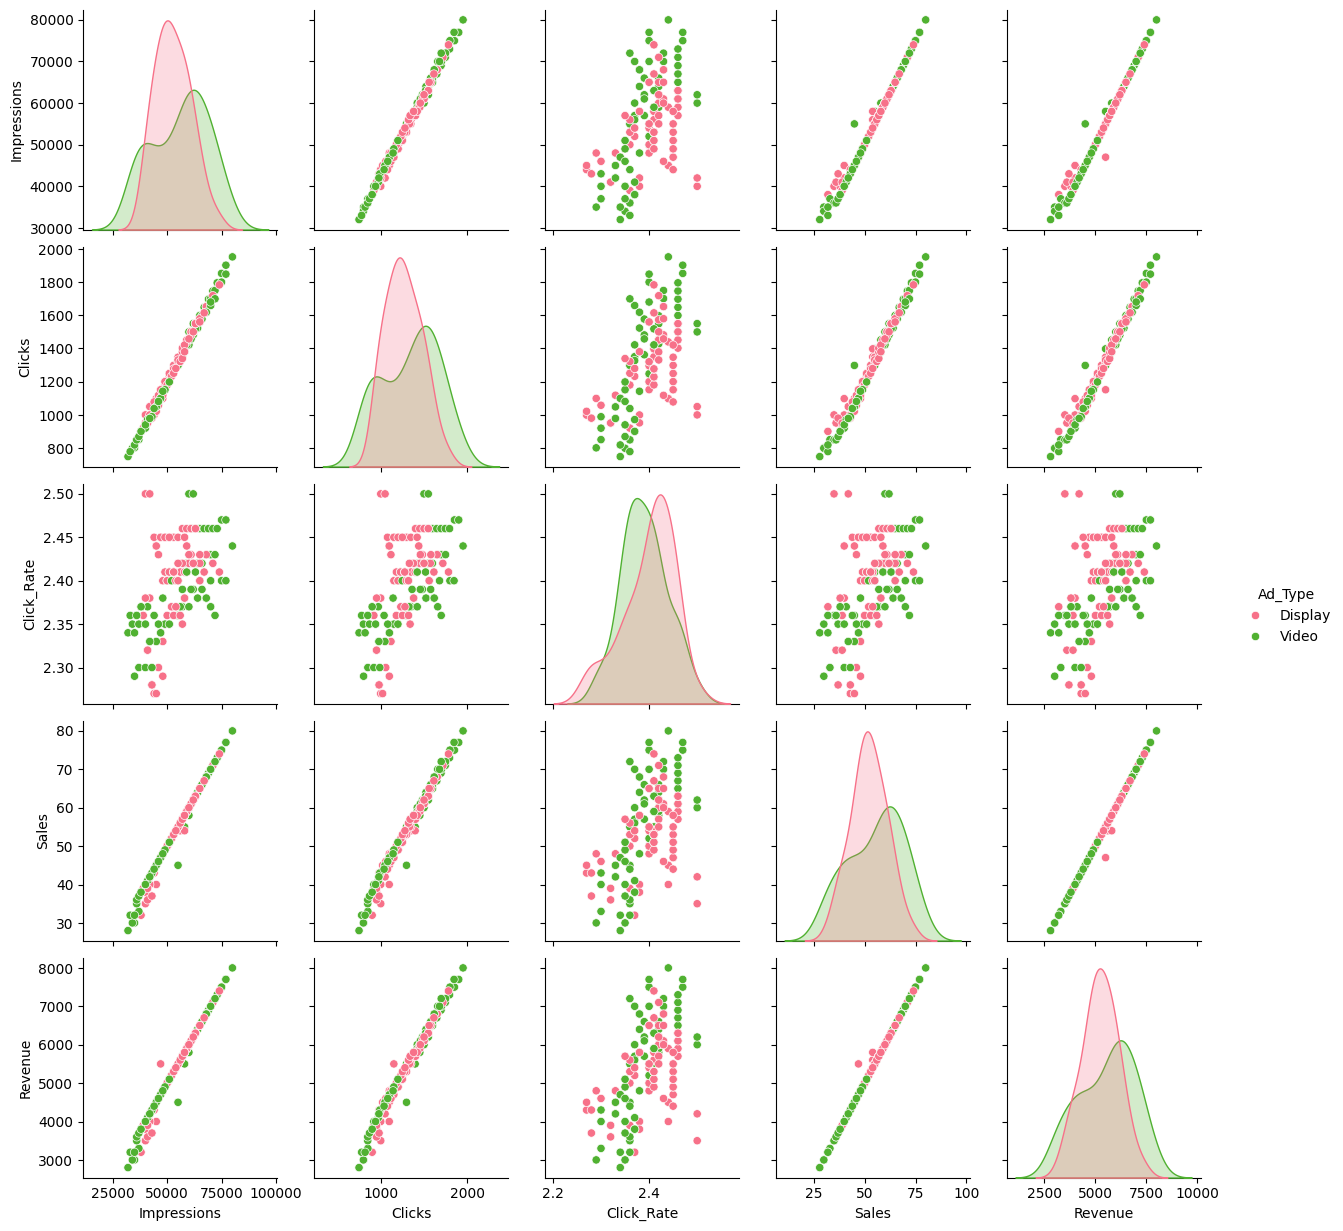

In [451]:
# To have a general look over dataset
sns.pairplot(dataFrame, hue="Ad_Type")

## **Research questions**

#### **Q1. Which advert type could be considered the most successful?**



Text(0, 0.5, 'Click Rate (%)')

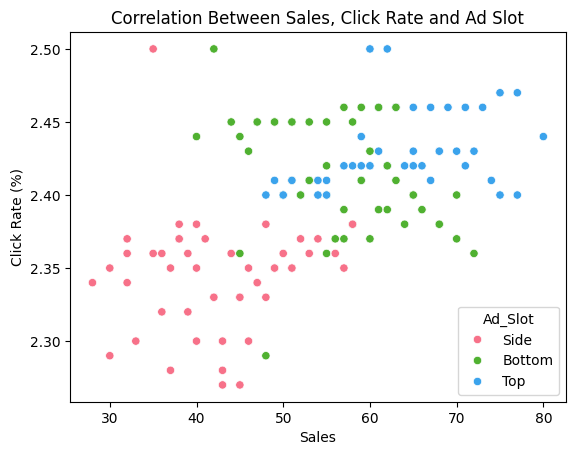

In [452]:
palette = sns.color_palette("husl", 3)
sns.set_palette(palette)
hue_order = ['Side', 'Bottom', 'Top']
sns.scatterplot(data = dataFrame, x = "Sales", y = "Click_Rate", hue = "Ad_Slot", hue_order=hue_order)
plt.title("Correlation Between Sales, Click Rate and Ad Slot")
plt.ylabel("Click Rate (%)")

##### *According to this scatter plot, ads that are located on Top have led to more sales. Those also had higher click rate, suggesting that consumers are more likely to click and watch on an ad if it is located on top. Similarly, ads on Side had lower click rates, suggesting either lower clicks or lower impresisons. Ads on Bottom side imply no defnite correlation between click rates and sales. However, when we come to the highest click rate value, we can see that the location does not matter and the highest click rate value can be achieved in every advertising position.We see that the lowest sales are ads positioned sideways. Overall, we can see that positioning ads on top is the most advantageous situation for an advertisement.*


<Axes: xlabel='Sales', ylabel='Click_Rate'>

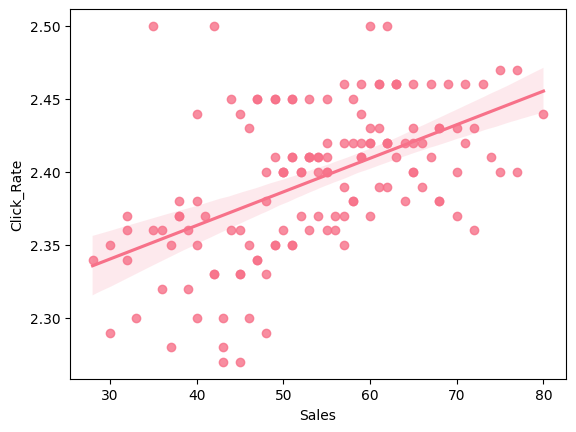

In [453]:
sns.regplot(data = dataFrame, x = "Sales", y = "Click_Rate")

##### *According to the graph here, we can see that there is a sligthly positive correlation between click\_rate and sales. This shows us that increasing click\_rate is the right strategy to increase sales. As we saw in the previous graph, placing ads in top positions to maximize click\_rate will increase the number of sales as well as click\_rate.*


<Axes: xlabel='Ad_Type', ylabel='Click_Rate'>

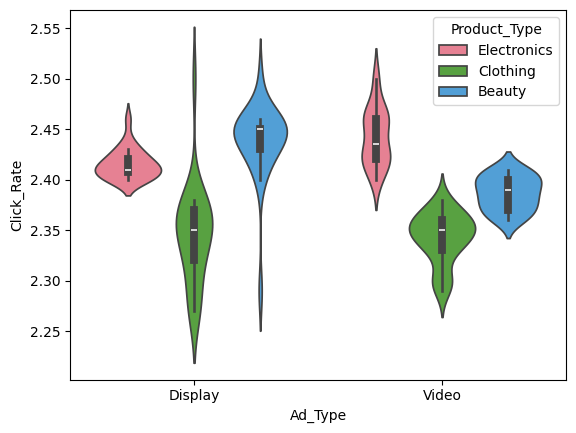

In [454]:
hue_order = ['Electronics', 'Clothing', 'Beauty']
sns.violinplot(data = dataFrame, y = "Click_Rate", x = "Ad_Type", hue = "Product_Type", hue_order=hue_order)

#### **Q2. Is there a notable difference in revenue due to seasons?**



<Axes: xlabel='Date', ylabel='Sales'>

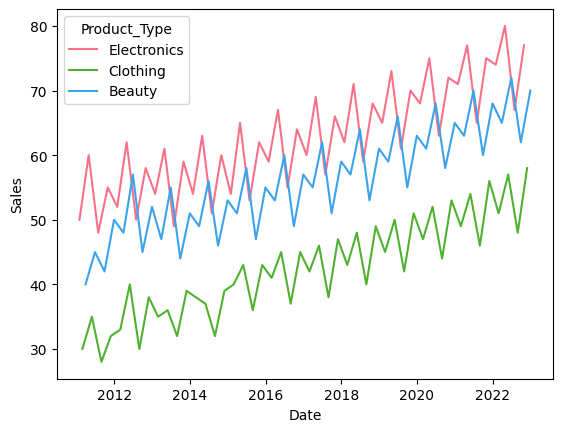

In [455]:
sns.lineplot(data = dataFrame,x = dataFrame["Date"].dt.to_timestamp(freq = "3M"), y = dataFrame["Sales"],hue = dataFrame["Product_Type"]) # date has been taken in 3 month periods

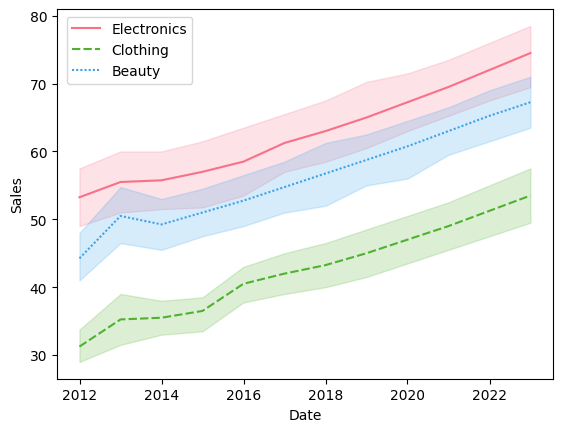

In [456]:
sns.lineplot(data = dataFrame,x = dataFrame["Date"].dt.to_timestamp("Y"), y = dataFrame["Sales"],hue = dataFrame["Product_Type"], style = 'Product_Type') # date has been taken in yearly periods

plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0)

#### **Q3. Do regions affect sales, are there weak or strong correlations that can be established in this interaction?**



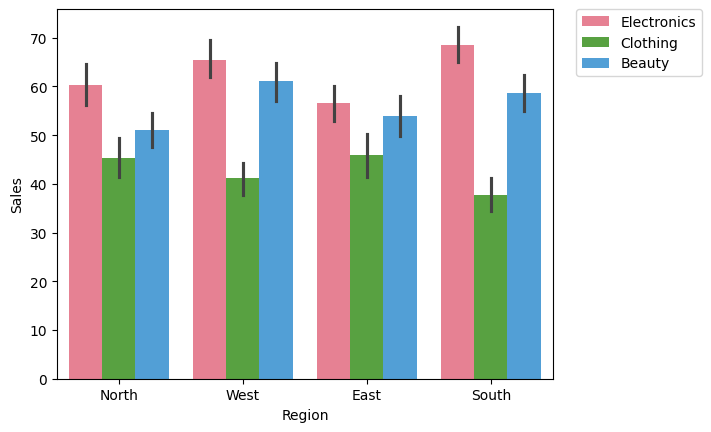

In [457]:
sns.barplot(data = dataFrame, y = "Sales", x = "Region", hue = "Product_Type")
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

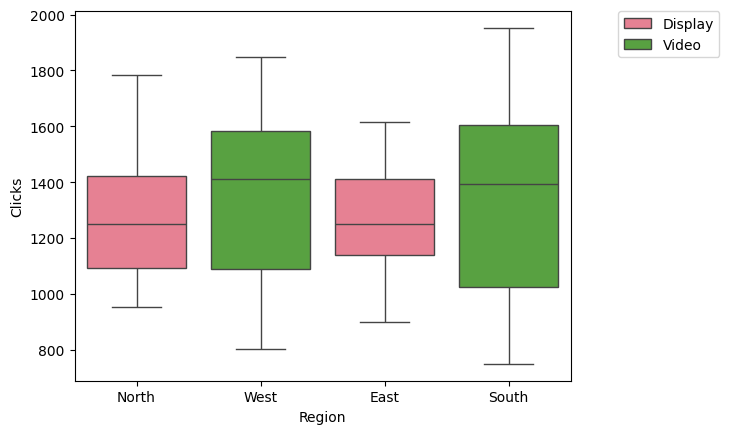

In [458]:
sns.boxplot(data = dataFrame, y = "Clicks", x = "Region", hue = "Ad_Type")
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

#### **Q4. Does the number of views have a direct impact on sales? If so, can the revenue earned from these sales show that a strategy to increase the number of views is profitable?**



<Axes: xlabel='Sales', ylabel='Impressions'>

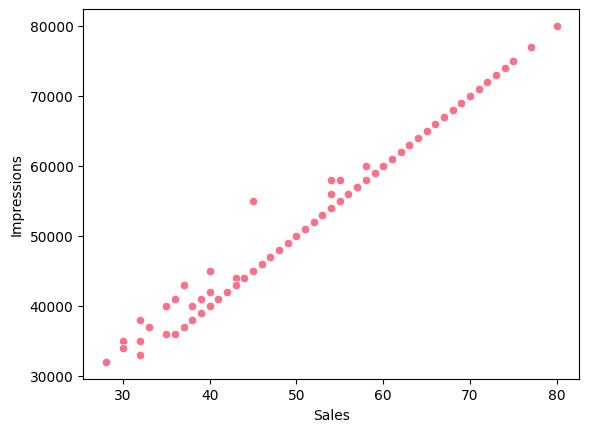

In [459]:
sns.scatterplot(data = dataFrame, x = "Sales", y = "Impressions")

<Axes: xlabel='Sales', ylabel='Revenue'>

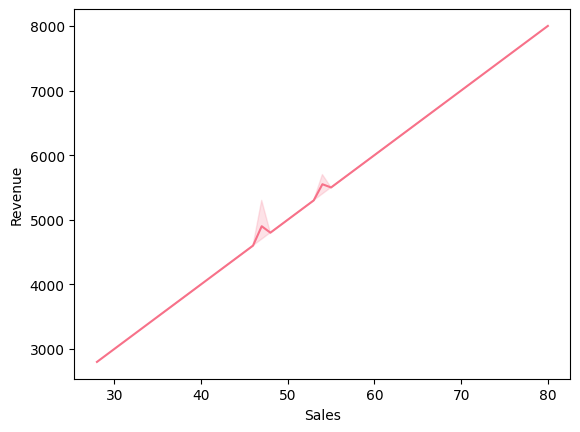

In [460]:
sns.lineplot(data = dataFrame, x="Sales", y="Revenue")

#### **Q5. Which type of products ads have generated more revenue? **



<Axes: xlabel='Revenue', ylabel='Count'>

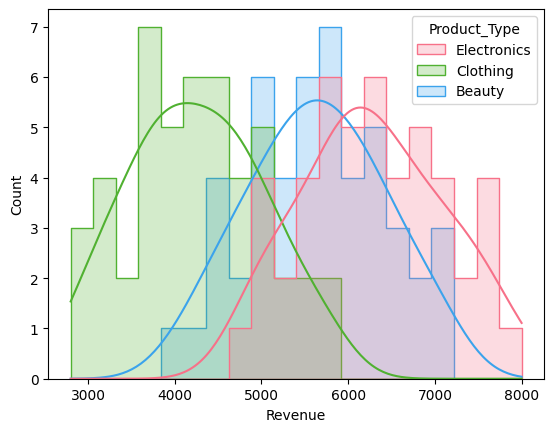

In [461]:
sns.histplot(data = dataFrame, x = "Revenue", hue = "Product_Type", kde = True, bins = 20, element = "step")

#Minecraft Plot v.2